In [1]:
import os 
from cv2 import imread, normalize, resize
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
case_list = ['Case_1', 'Case_2','Case_3','Case_4']
Y_image = []
X_image = []

for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr0' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [ ]:
for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr1' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [ ]:
'''
file_name_list = []
depth_avg_list = []

with open('C:/Users/user/Desktop/sem/train/average_depth.csv', 'r') as file:
    file_read = csv.reader(file)
    for line in file:
        new_line = line.replace("\n", "")
        new_line2 = new_line.split(',')
        file_name_list.append(new_line2[0])	
        depth_avg_list.append(new_line2[1])
        
del file_name_list[0]
del depth_avg_list[0]

depth_list = ['Depth_110', 'Depth_120','Depth_130','Depth_140']

for depht in depth_list:
    path = 'C:/Users/user/Desktop/sem/train/SEM/' +  depht # 폴더 경로
    folder_list = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음


    for folder_name in folder_list:
        temp_path = path + '/' + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        temp_y_name = depht.lower() + '_' + folder_name
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            X_image.append(image)
            
            avg_depth = float(depth_avg_list[int(file_name_list.index(temp_y_name))])
            Y_image_temp = np.ones(shape=(f.shape[0],f.shape[1]), dtype=np.float64)
            Y_image.append(Y_image_temp * (avg_depth / 255))
'''
        

In [ ]:
X_image = np.expand_dims(X_image, axis=-1)
X_image.shape

In [ ]:
Y_image = np.expand_dims(Y_image, axis=-1)
Y_image.shape

In [ ]:
plt.imshow(X_image[2])
plt.show()

In [ ]:
plt.imshow(Y_image[2])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(X_image, Y_image, test_size= 0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size= 0.25)

In [ ]:
x_train = np.array(x_train,dtype=np.float64)
y_train = np.array(y_train,dtype=np.float64)

x_val = np.array(x_val,dtype=np.float64)
y_val = np.array(y_val,dtype=np.float64)

x_test = np.array(x_test,dtype=np.float64)
y_test = np.array(y_test,dtype=np.float64)

path = 'C:/Users/user/Desktop/sem'
os.chdir(path)

checkpoint_path = "C:/Users/user/Desktop/sem/weight/unet/cp-{epoch:02d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  monitor='val_loss', verbose=1, mode="min")

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                              patience=9)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, verbose=1, mode="min",
                              patience=7, min_lr=0.00001)

In [ ]:
'''
from tensorflow.keras import backend as K

def my_mse(y_true, y_pred):
    #difference between true label and predicted label
    
    if float(y_true[0][0][0]) <= 1:
        mean_sqr_error = K.mean(K.square(y_pred - y_true))
        
    else:
        y_pred_avg= K.mean(y_pred) 
        y_true_avg = float(y_true[0][0][0]) / 255
        mean_sqr_error = K.square(y_true_avg-y_pred_avg)
        
    return mean_sqr_error

'''

In [ ]:
from keras_unet_collection import models

model = models.unet_plus_2d((f.shape[0],f.shape[1],1), [32, 64, 128, 512], n_labels= 1, output_activation=None, batch_norm=True, deep_supervision=True)


model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4))
history = model.fit(x_train, y_train, 
                         validation_data=(x_val, y_val),
                         epochs=50, batch_size = 64,
                         callbacks= [ earlystopping, reduce_lr, cp_callback])

In [ ]:
def plot_model__hist(hist):
    plt.figure(figsize=(6,6))
    #plt.style.use("ggplot")
    plt.plot(hist.history['loss'], color='b', label="Training loss")
    plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
    plt.legend()
    plt.show()

In [2]:
from keras_unet_collection import models

max_point = 47

In [3]:
model = models.unet_plus_2d((72,48,1), [32, 64, 128, 512], n_labels= 1, output_activation=None, batch_norm=True, deep_supervision=True)
#val_loss_history = history.history["val_loss"]
#max_point = val_loss_history.index(min(val_loss_history))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4),
        loss='MSE',
        metrics=['mse'])

if max_point > 8:
    model.load_weights(
        "C:/Users/user/Desktop/sem/weight/unet/cp-" + str(max_point+1) + ".ckpt"
    )
else:
    model.load_weights(
        "C:/Users/user/Desktop/sem/weight/unet/cp-0" + str(max_point+1) + ".ckpt"
    )

----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	xnet_output_sup0
	xnet_output_sup1
	xnet_output_sup2
	xnet_output_final


In [ ]:
#score = model.evaluate(x_val, y_val)

#plot_model__hist(history)

In [ ]:
decoded_images = model.predict(x_test)

In [ ]:
distance_gap = decoded_images*255 - y_test*255
distance_gap_new = distance_gap.reshape(y_test.shape[0],-1)

avg_depth = np.mean(distance_gap_new,axis=1)

In [ ]:
np.mean(avg_depth)

In [ ]:
plt.hist(avg_depth)

plt.show()

In [ ]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(y_test[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Original Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [4]:
path = 'C:/Users/user/Desktop/sem/test/SEM' # 폴더 경로

test_image = []


os.chdir(path) # 해당 폴더로 이동
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    
for file in files:
    f = imread(file, cv2.IMREAD_GRAYSCALE)
    image = f / 255
    test_image.append(image)

In [5]:
qwer = np.expand_dims(image, axis=-1)

In [6]:
decoded_images = model.predict(np.array(qwer, dtype=np.float64))

ValueError: in user code:

    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\user\.conda\envs\position31\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer xnet_model: expected shape=(None, 72, 48, 1), found shape=(None, 48, 1)


In [ ]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(test_image[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('SEM Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [ ]:
import zipfile
def inference(decoded_images, files):
        
    os.makedirs('../../submission', exist_ok=True)
    os.chdir("../../submission")
    sub_imgs = []
    
    for path, pred_img in zip(files, decoded_images):
        cv2.imwrite(path, pred_img*255)
        sub_imgs.append(path)
        
    submission = zipfile.ZipFile("../submission.zip", 'w')
    for path in sub_imgs:
        submission.write(path)
    submission.close()
    
inference(decoded_images, files)

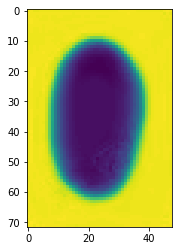

In [7]:
grayImg = cv2.imread('C:/Users/user/Desktop/sem/submission/000000.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(grayImg)
plt.show()

In [4]:
plt.imshow(decoded_images[0])
plt.show()

NameError: name 'plt' is not defined